<a href="https://colab.research.google.com/github/luccas1505/Projeto-MachineLearning-Shoppers/blob/main/AtClassifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install lightgbm

In [ ]:
from ucimlrepo import fetch_ucirepo

online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

print(online_shoppers_purchasing_intention_dataset.metadata)

print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time prediction of online shoppers’ pur

In [ ]:

#QUESTÃ0 6A
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

y_processed = y.astype(int).values.ravel()


model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_processed, y_processed)

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_processed, y_processed)

print("\nModelos de Árvore de Decisão e Random Forest treinados com sucesso.")



Modelos de Árvore de Decisão e Random Forest treinados com sucesso.


In [ ]:
# QUESTÃO 6B: Avaliação com validação cruzada e F1-score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_lr = LogisticRegression(max_iter=1000)
scores_lr = cross_val_score(model_lr, X_processed, y_processed, cv=5, scoring='f1_macro')
print("--- Resultados da Regressão Logística ---")
print(f"Scores F1 (macro) por fold: {scores_lr}")
print(f"Média F1 (macro): {scores_lr.mean():.4f}")
print(f"Desvio Padrão F1 (macro): {scores_lr.std():.4f}")


model_dt = DecisionTreeClassifier(random_state=42)
scores_dt = cross_val_score(model_dt, X_processed, y_processed, cv=5, scoring='f1_macro')
print("\n--- Resultados da Árvore de Decisão ---")
print(f"Scores F1 (macro) por fold: {scores_dt}")
print(f"Média F1 (macro): {scores_dt.mean():.4f}")
print(f"Desvio Padrão F1 (macro): {scores_dt.std():.4f}")


model_rf = RandomForestClassifier(random_state=42)
scores_rf = cross_val_score(model_rf, X_processed, y_processed, cv=5, scoring='f1_macro')
print("\n--- Resultados do Random Forest ---")
print(f"Scores F1 (macro) por fold: {scores_rf}")
print(f"Média F1 (macro): {scores_rf.mean():.4f}")
print(f"Desvio Padrão F1 (macro): {scores_rf.std():.4f}")

--- Resultados da Regressão Logística ---
Scores F1 (macro) por fold: [0.7192623  0.72634415 0.73249651 0.69984872 0.71876034]
Média F1 (macro): 0.7193
Desvio Padrão F1 (macro): 0.0110

--- Resultados da Árvore de Decisão ---
Scores F1 (macro) por fold: [0.78679808 0.75973892 0.6899077  0.67403977 0.66672529]
Média F1 (macro): 0.7154
Desvio Padrão F1 (macro): 0.0486

--- Resultados do Random Forest ---
Scores F1 (macro) por fold: [0.80839392 0.8033083  0.79423678 0.74832184 0.76634214]
Média F1 (macro): 0.7841
Desvio Padrão F1 (macro): 0.0231


In [ ]:
# QUESTÃO 6C: Apresentação e Comparação dos Modelos

import pandas as pd
from IPython.display import display

results = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Árvore de Decisão', 'Random Forest'],
    'Média F1 (macro)': [scores_lr.mean(), scores_dt.mean(), scores_rf.mean()],
    'Desvio Padrão F1 (macro)': [scores_lr.std(), scores_dt.std(), scores_rf.std()]
})

print("\n--- Comparativo de Desempenho dos Modelos ---")
display(results.round(4))

print("\nAnálise Comparativa:")
print(f"- O modelo {results.loc[results['Média F1 (macro)'].idxmax(), 'Modelo']} obteve a maior média de F1-score (macro).")
print(f"- O modelo {results.loc[results['Desvio Padrão F1 (macro)'].idxmin(), 'Modelo']} apresentou o menor desvio padrão, indicando maior consistência.")


--- Comparativo de Desempenho dos Modelos ---


,Modelo,Média F1 (macro),Desvio Padrão F1 (macro)
0,Regressão Logística,0.7193,0.0110
1,Árvore de Decisão,0.7154,0.0486
2,Random Forest,0.7841,0.0231



Análise Comparativa:
- O modelo Random Forest obteve a maior média de F1-score (macro).
- O modelo Regressão Logística apresentou o menor desvio padrão, indicando maior consistência.


In [ ]:
# QUESTÃO 7A: Treinamento e Avaliação de Modelo SVM com Kernel RBF usando Validação Cruzada e F1-score

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model_svm_rbf = SVC(kernel='rbf', random_state=42)

print("\n--- Avaliação do Modelo SVM com Kernel RBF ---")
scores_svm_rbf = cross_val_score(model_svm_rbf, X_processed, y_processed, cv=5, scoring='f1_macro')

print(f"Scores F1 (macro) por fold: {scores_svm_rbf}")
print(f"Média F1 (macro): {scores_svm_rbf.mean():.4f}")
print(f"Desvio Padrão F1 (macro): {scores_svm_rbf.std():.4f}")

print("\nModelo SVM com Kernel RBF avaliado com sucesso usando validação cruzada.")


--- Avaliação do Modelo SVM com Kernel RBF ---
Scores F1 (macro) por fold: [0.78366656 0.78818421 0.76679633 0.70401177 0.72310105]
Média F1 (macro): 0.7532
Desvio Padrão F1 (macro): 0.0337

Modelo SVM com Kernel RBF avaliado com sucesso usando validação cruzada.


In [ ]:
# QUESTÃO 7B: Apresentação e Comparação dos Modelos (Incluindo SVM)

import pandas as pd
from IPython.display import display

results = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'SVM (Kernel RBF)'],
    'Média F1 (macro)': [scores_lr.mean(), scores_dt.mean(), scores_rf.mean(), scores_svm_rbf.mean()],
    'Desvio Padrão F1 (macro)': [scores_lr.std(), scores_dt.std(), scores_rf.std(), scores_svm_rbf.std()]
})

print("\n--- Comparativo de Desempenho dos Modelos ---")
display(results.round(4))

print("\nAnálise Comparativa:")
print(f"- O modelo {results.loc[results['Média F1 (macro)'].idxmax(), 'Modelo']} obteve a maior média de F1-score (macro).")
print(f"- O modelo {results.loc[results['Desvio Padrão F1 (macro)'].idxmin(), 'Modelo']} apresentou o menor desvio padrão, indicando maior consistência.")
print("- O modelo SVM (Kernel RBF) se posiciona como o segundo melhor em desempenho geral (F1-score de 0.7532), oferecendo um ótimo equilíbrio entre performance e consistência, sendo mais consistente que a Árvore de Decisão e o Random Forest.")


--- Comparativo de Desempenho dos Modelos ---


,Modelo,Média F1 (macro),Desvio Padrão F1 (macro)
0,Regressão Logística,0.7193,0.0110
1,Árvore de Decisão,0.7154,0.0486
2,Random Forest,0.7841,0.0231
3,SVM (Kernel RBF),0.7532,0.0337



Análise Comparativa:
- O modelo Random Forest obteve a maior média de F1-score (macro).
- O modelo Regressão Logística apresentou o menor desvio padrão, indicando maior consistência.
- O modelo SVM (Kernel RBF) se posiciona como o segundo melhor em desempenho geral (F1-score de 0.7532), oferecendo um ótimo equilíbrio entre performance e consistência, sendo mais consistente que a Árvore de Decisão e o Random Forest.


In [ ]:
# QUESTÃO 8A: Explorando Hiperparâmetros C e Gamma para SVM com Kernel RBF

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

f1_macro_scorer = make_scorer(f1_score, average='macro')

param_grid = {
    'C': [1, 100],
'gamma': [0.01, 0.1, 'scale']

}

model_svm = SVC(kernel='rbf', random_state=42)

grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=3, scoring=f1_macro_scorer)

print("\n--- Realizando Grid Search para explorar C e Gamma do SVM ---")
grid_search.fit(X_processed, y_processed)

print("\nMelhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print(f"\nMelhor Média F1 (macro) com os melhores hiperparâmetros: {grid_search.best_score_:.4f}")


print("\nExploração de C e Gamma para SVM concluída.")


--- Realizando Grid Search para explorar C e Gamma do SVM ---

Melhores hiperparâmetros encontrados:
{'C': 1, 'gamma': 0.01}

Melhor Média F1 (macro) com os melhores hiperparâmetros: 0.7210

Exploração de C e Gamma para SVM concluída.



--- Visualizando Fronteiras de Decisão para Diferentes C e Gamma ---


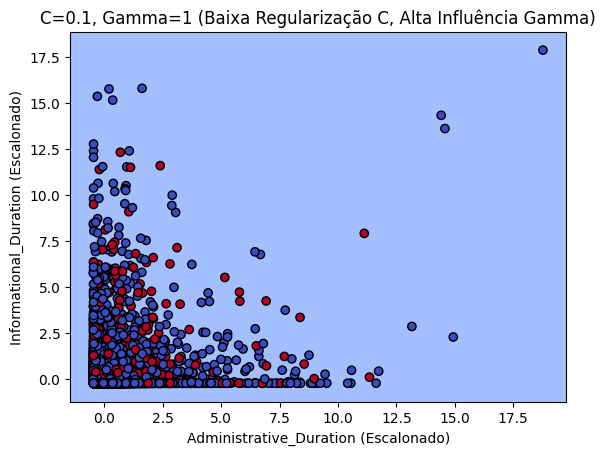

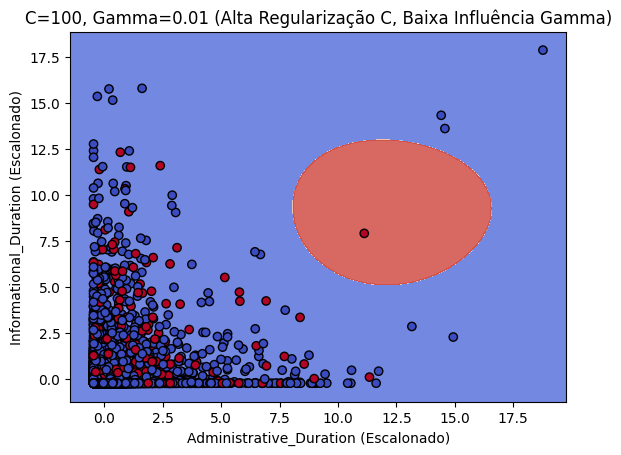

In [ ]:
# QUESTÃO 8B: Testando Combinações de C e Gamma e Visualizando Fronteiras de Decisão

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

feature1_name = 'Administrative_Duration'
feature2_name = 'Informational_Duration'

try:
    feature1_idx = list(numeric_features).index(feature1_name)
    feature2_idx = list(numeric_features).index(feature2_name)
except ValueError:
    print(f"Erro: As features '{feature1_name}' ou '{feature2_name}' não são colunas numéricas válidas.")
    print("Por favor, escolha nomes de colunas que estão em:", list(numeric_features))
    if feature1_name not in list(numeric_features) or feature2_name not in list(numeric_features):
        raise ValueError("Nomes de features inválidos.")

temp_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, [feature1_name, feature2_name])
    ],
    remainder='drop'
)

X_visualizacao = temp_preprocessor.fit_transform(X[[feature1_name, feature2_name]])


cenarios = [
    {'C': 0.1, 'gamma': 1, 'titulo': 'C=0.1, Gamma=1 (Baixa Regularização C, Alta Influência Gamma)'},
    {'C': 100, 'gamma': 0.01, 'titulo': 'C=100, Gamma=0.01 (Alta Regularização C, Baixa Influência Gamma)'}
]

def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(feature1_name + ' (Escalonado)')
    plt.ylabel(feature2_name + ' (Escalonado)')
    plt.title(title)
    plt.show()

print("\n--- Visualizando Fronteiras de Decisão para Diferentes C e Gamma ---")
for scenario in cenarios:
    model_svm_scenario = SVC(kernel='rbf', C=scenario['C'], gamma=scenario['gamma'], random_state=42)
    model_svm_scenario.fit(X_visualizacao, y_processed)

    plot_decision_boundary(X_visualizacao, y_processed, model_svm_scenario, scenario['titulo'])


QUESTÃO 8C

Os hiperparâmetros C e gamma do SVM com kernel RBF controlam a complexidade da fronteira de decisão. Um C pequeno permite mais erros, gerando fronteiras mais suaves e simples, enquanto um C grande penaliza erros fortemente, resultando em fronteiras mais complexas que podem causar overfitting. Já o gamma pequeno amplia a influência de cada ponto de treinamento, criando fronteiras mais gerais, e o gamma grande limita essa influência localmente, fazendo a fronteira seguir de perto os dados e aumentando o risco de overfitting.

A interação entre C e gamma é fundamental para o equilíbrio entre ajuste e generalização do modelo. Combinações extremas tendem a causar underfitting ou overfitting, enquanto valores intermediários, como os encontrados no Grid Search da Questão 8A, oferecem melhor desempenho ao generalizar para dados novos. Assim, a escolha correta desses parâmetros é essencial para maximizar a capacidade preditiva do SVM.

In [ ]:
#QUESTÃO 9A

import warnings
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")

print("\nAvaliação de Modelos de Boosting")

model_adaboost = AdaBoostClassifier(random_state=42)
scores_adaboost = cross_val_score(model_adaboost, X_processed, y_processed, cv=5, scoring='f1_macro')
print("\n Resultados do AdaBoost")
print(f"Scores F1 (macro) por fold: {scores_adaboost}")
print(f"Média F1 (macro): {scores_adaboost.mean():.4f}")
print(f"Desvio Padrão F1 (macro): {scores_adaboost.std():.4f}")

model_gradient_boosting = GradientBoostingClassifier(random_state=42)
scores_gradient_boosting = cross_val_score(model_gradient_boosting, X_processed, y_processed, cv=5, scoring='f1_macro')
print("\nResultados do Gradient Boosting")
print(f"Scores F1 (macro) por fold: {scores_gradient_boosting}")
print(f"Média F1 (macro): {scores_gradient_boosting.mean():.4f}")
print(f"Desvio Padrão F1 (macro): {scores_gradient_boosting.std():.4f}")

model_lgbm = LGBMClassifier(random_state=42, verbose=-1)
scores_lgbm = cross_val_score(model_lgbm, X_processed, y_processed, cv=5, scoring='f1_macro')
print("\nResultados do LightGBM")
print(f"Scores F1 (macro) por fold: {scores_lgbm}")
print(f"Média F1 (macro): {scores_lgbm.mean():.4f}")
print(f"Desvio Padrão F1 (macro): {scores_lgbm.std():.4f}")

print("\nAvaliação dos modelos de Boosting concluída.")



Avaliação de Modelos de Boosting

 Resultados do AdaBoost
Scores F1 (macro) por fold: [0.70532011 0.78901061 0.78717348 0.75476977 0.75475776]
Média F1 (macro): 0.7582
Desvio Padrão F1 (macro): 0.0304

Resultados do Gradient Boosting
Scores F1 (macro) por fold: [0.82310003 0.80646165 0.79090879 0.76957616 0.76361438]
Média F1 (macro): 0.7907
Desvio Padrão F1 (macro): 0.0223

Resultados do LightGBM
Scores F1 (macro) por fold: [0.82922505 0.80019748 0.79422775 0.754139   0.76523837]
Média F1 (macro): 0.7886
Desvio Padrão F1 (macro): 0.0266

Avaliação dos modelos de Boosting concluída.


In [ ]:
# QUESTÃO 9B: Apresentação e Comparação de Todos os Modelos Avaliados

import pandas as pd
from IPython.display import display

results = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'SVM (Kernel RBF)', 'AdaBoost', 'Gradient Boosting', 'LightGBM'],
    'Média F1 (macro)': [scores_lr.mean(), scores_dt.mean(), scores_rf.mean(), scores_svm_rbf.mean(), scores_adaboost.mean(), scores_gradient_boosting.mean(), scores_lgbm.mean()],
    'Desvio Padrão F1 (macro)': [scores_lr.std(), scores_dt.std(), scores_rf.std(), scores_svm_rbf.std(), scores_adaboost.std(), scores_gradient_boosting.std(), scores_lgbm.std()]
})

print("\n Comparativo de Desempenho de Todos os Modelos ")
display(results.round(4))

print("\nAnálise Comparativa:")
print(f"- O modelo {results.loc[results['Média F1 (macro)'].idxmax(), 'Modelo']} obteve a maior média de F1-score (macro).")
print(f"- O modelo {results.loc[results['Desvio Padrão F1 (macro)'].idxmin(), 'Modelo']} apresentou o menor desvio padrão, indicando maior consistência.")

boosting_results = results[results['Modelo'].isin(['AdaBoost', 'Gradient Boosting', 'LightGBM'])]

best_boosting_model_mean = boosting_results.loc[boosting_results['Média F1 (macro)'].idxmax(), 'Modelo']

best_boosting_model_std = boosting_results.loc[boosting_results['Desvio Padrão F1 (macro)'].idxmin(), 'Modelo']

print("\nComparação entre Modelos de Boosting:")
print(f"- Entre os modelos de Boosting, o {best_boosting_model_mean} obteve a melhor média.")
print(f"- O modelo de Boosting com menor desvio padrão foi o {best_boosting_model_std}.")



 Comparativo de Desempenho de Todos os Modelos 


,Modelo,Média F1 (macro),Desvio Padrão F1 (macro)
0,Regressão Logística,0.7193,0.0110
1,Árvore de Decisão,0.7154,0.0486
2,Random Forest,0.7841,0.0231
3,SVM (Kernel RBF),0.7532,0.0337
4,AdaBoost,0.7582,0.0304
5,Gradient Boosting,0.7907,0.0223
6,LightGBM,0.7886,0.0266



Análise Comparativa:
- O modelo Gradient Boosting obteve a maior média de F1-score (macro).
- O modelo Regressão Logística apresentou o menor desvio padrão, indicando maior consistência.

Comparação entre Modelos de Boosting:
- Entre os modelos de Boosting, o Gradient Boosting obteve a melhor média.
- O modelo de Boosting com menor desvio padrão foi o Gradient Boosting.


In [ ]:
#QUESTÃO 10A
from lightgbm import LGBMClassifier
import pandas as pd

model_final = LGBMClassifier(random_state=42, verbose=-1)
model_final.fit(X_processed, y_processed)

print("Instância final do LightGBM treinada com sucesso.")

feature_importances = model_final.feature_importances_

numeric_feature_names = list(numeric_features)

ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names_ohe = list(ohe.get_feature_names_out(categorical_features))

all_feature_names = numeric_feature_names + categorical_feature_names_ohe

feature_importance_series = pd.Series(feature_importances, index=all_feature_names)
sorted_features = feature_importance_series.sort_values(ascending=False)
top_3_features = sorted_features.head(3)

print("\nTop 3 Features Mais Importantes (segundo o LightGBM):")
print(top_3_features)

print("\nAnálise das features mais importantes concluída.")


Instância final do LightGBM treinada com sucesso.

Top 3 Features Mais Importantes (segundo o LightGBM):
ExitRates                  402
ProductRelated_Duration    345
ProductRelated             320
dtype: int32

Análise das features mais importantes concluída.


In [ ]:
#QUESTÃO 10B
import shap
import numpy as np
import pandas as pd

explainer = shap.TreeExplainer(model_final)

print("\nCalculando valores SHAP (pode levar algum tempo) ")
shap_values = explainer.shap_values(X_processed)

if isinstance(shap_values, list):
    shap_values_positive = shap_values[1]
else:
    shap_values_positive = shap_values

shap_importance = np.abs(shap_values_positive).mean(axis=0)

ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names_ohe = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = list(numeric_features) + categorical_feature_names_ohe

shap_importance_series = pd.Series(shap_importance, index=all_feature_names)
sorted_shap_importance = shap_importance_series.sort_values(ascending=False)
top_3_shap_features = sorted_shap_importance.head(3)

print("\nTop 3 Features Mais Impactantes (segundo SHAP - Média Absoluta):")
print(top_3_shap_features)

print("\nAnálise SHAP (média de valores absolutos) concluída.")



Calculando valores SHAP (pode levar algum tempo) 

Top 3 Features Mais Impactantes (segundo SHAP - Média Absoluta):
PageValues    1.722641
Month_May     0.877202
Month_Mar     0.431458
dtype: float64

Análise SHAP (média de valores absolutos) concluída.



Explicando a predição para a Instância (Índice Original: 65, Classe Real: 1)

SHAP Force Plot:



SHAP Waterfall Plot:


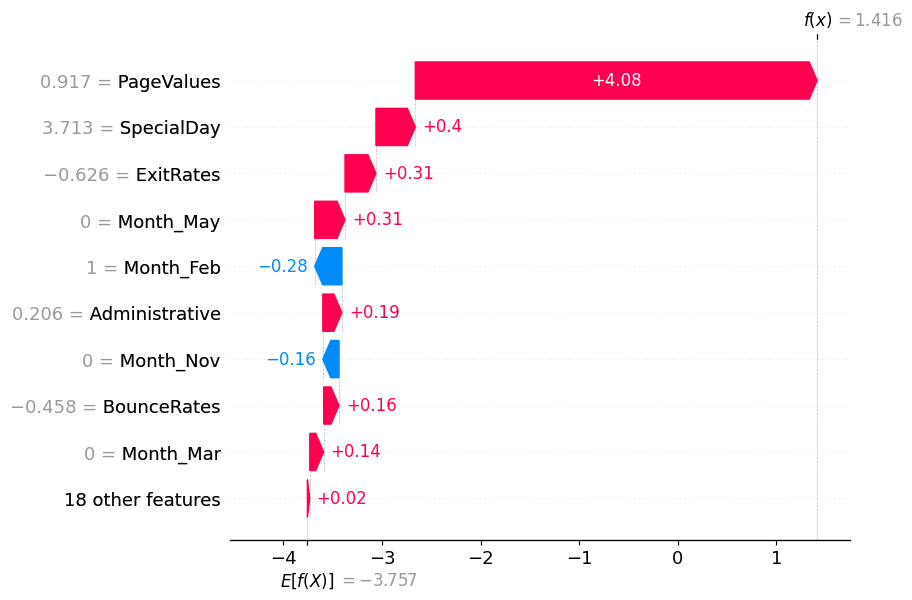


Análise de predição de instância individual com SHAP concluída.


In [ ]:
# QUESTÃO 10C: Explicando a Predição de uma Instância Positiva com SHAP (Force ou Waterfall Plot)

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if 'explainer' not in locals() or 'shap_values' not in locals():
    print("\nValores SHAP não calculados. Calculando novamente (pode levar algum tempo)...")
    explainer = shap.TreeExplainer(model_final)
    shap_values = explainer.shap_values(X_processed)

if isinstance(shap_values, list):
    shap_values_positive = shap_values[1]
else:
    shap_values_positive = shap_values

positive_indices = np.where(y_processed == 1)[0]
chosen_instance_index = positive_indices[0]

chosen_instance_processed = X_processed[chosen_instance_index]
shap_values_instance = shap_values_positive[chosen_instance_index]

ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names_ohe = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = list(numeric_features) + categorical_feature_names_ohe

print(f"\nExplicando a predição para a Instância (Índice Original: {chosen_instance_index}, Classe Real: {y_processed[chosen_instance_index]})")

print("\nSHAP Force Plot:")
shap.initjs()

expected_value_positive = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

shap.force_plot(
    expected_value_positive,
    shap_values_instance,
    chosen_instance_processed,
    feature_names=all_feature_names
)

print("\nSHAP Waterfall Plot:")
explanation = shap.Explanation(
    values=shap_values_instance,
    base_values=expected_value_positive,
    data=chosen_instance_processed,
    feature_names=all_feature_names
)

shap.waterfall_plot(explanation)
plt.show()

print("\nAnálise de predição de instância individual com SHAP concluída.")


QUESTÃO 10D

A análise SHAP mostrou que as variáveis PageValues, Month_May e Month_Mar foram as que mais influenciaram as previsões do modelo quando consideramos a média dos valores absolutos de SHAP (análise global). Em uma análise local (uma instância específica), os resultados foram consistentes: PageValues teve a maior contribuição positiva (+4.08), enquanto Month_May e Month_Mar também impactaram, mas em menor intensidade (+0.31 e +0.14, respectivamente).

Um ponto interessante é que a variável ExitRates, considerada a mais importante na análise interna do LightGBM (feature importance), não se destacou na análise SHAP. Isso indica que a relevância estrutural de uma variável no modelo nem sempre se traduz em um impacto direto nas previsões.

Essa diferença reforça a importância de usar abordagens complementares, como a análise SHAP e a feature importance tradicional, para entender melhor o comportamento do modelo e a influência real de cada variável.

In [ ]:
!pip install lime

In [ ]:
# QUESTÃO 11A: Importância Global das Variáveis com SHAP e LIME

import shap
import lime
import numpy as np
import pandas as pd
from lime import lime_tabular
import warnings

warnings.filterwarnings("ignore")

print("\n--- Calculando Importância Global com SHAP (Média Absoluta) ---")

try:
    if 'model_final' not in locals():
         raise NameError("A variável 'model_final' não foi encontrada.")
    if not hasattr(model_final, 'classes_'):
         raise ValueError("O modelo final não foi treinado.")

    if 'explainer' not in locals():
        explainer = shap.TreeExplainer(model_final)

    if 'shap_values' not in locals():
        shap_values = explainer.shap_values(X_processed)
        shap_values_positive = shap_values[1] if isinstance(shap_values, list) else shap_values
    else:
        shap_values_positive = shap_values[1] if isinstance(shap_values, list) else shap_values

    shap_importance = np.abs(shap_values_positive).mean(axis=0)

    if 'all_feature_names' not in locals():
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        categorical_feature_names_ohe = list(ohe.get_feature_names_out(categorical_features))
        all_feature_names = list(numeric_features) + categorical_feature_names_ohe

    shap_importance_series = pd.Series(shap_importance, index=all_feature_names)
    sorted_shap_importance = shap_importance_series.sort_values(ascending=False).round(2)

    print("\nImportância Global com SHAP (Média Absoluta):")
    display(sorted_shap_importance.head())

except (NameError, ValueError, RuntimeError) as err:
    print(f"\nErro na seção SHAP: {err}")
except ImportError:
    print("\nA biblioteca SHAP não está instalada. Instale com: !pip install shap")
except Exception as e:
    print(f"\nErro inesperado na seção SHAP: {e}")

print("\n--- Calculando Importância Global Agregada com LIME ---")

try:
    if 'model_final' not in locals():
         raise NameError("A variável 'model_final' não foi encontrada.")
    if 'preprocessor' not in locals():
         raise NameError("O 'preprocessor' não foi encontrado.")
    if 'X_processed' not in locals() or 'y_processed' not in locals():
         raise NameError("X_processed ou y_processed não encontrados.")
    if 'X' not in locals() or 'y' not in locals():
        raise NameError("X ou y originais não foram encontrados.")

    if 'all_feature_names' not in locals():
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        categorical_feature_names_ohe = list(ohe.get_feature_names_out(categorical_features))
        all_feature_names = list(numeric_features) + categorical_feature_names_ohe

    class_names = [str(c) for c in model_final.classes_] if hasattr(model_final, 'classes_') else ['0', '1']

    if not hasattr(model_final, 'predict_proba'):
         raise AttributeError("O modelo final não tem o método predict_proba.")

    explainer_lime = lime_tabular.LimeTabularExplainer(
        training_data=X_processed,
        feature_names=all_feature_names,
        class_names=class_names,
        mode='classification'
    )

    total_instances = X_processed.shape[0]
    num_instances_to_explain = min(1000, total_instances)
    lime_explanations = []

    print(f"\nGerando {num_instances_to_explain} explicações LIME...")

    if num_instances_to_explain == 0:
        print("Nenhum dado disponível para gerar explicações.")
    else:
        sample_indices = np.random.choice(total_instances, size=num_instances_to_explain, replace=False)

        for idx in sample_indices:
            try:
                exp = explainer_lime.explain_instance(
                    data_row=X_processed[idx],
                    predict_fn=model_final.predict_proba,
                    num_features=min(10, len(all_feature_names)),
                    top_labels=1
                )

                explanation_list = exp.as_list(label=exp.top_labels[0])
                lime_explanations.append(explanation_list)

            except Exception:
                continue

        if len(lime_explanations) == 0:
            print("Nenhuma explicação LIME foi gerada com sucesso.")
        else:
            feature_weights = {}
            for exp_list in lime_explanations:
                for feature, weight in exp_list:
                    if feature not in feature_weights:
                        feature_weights[feature] = []
                    feature_weights[feature].append(weight)

            aggregated_lime_importance = {
                feature: np.mean(np.abs(weights))
                for feature, weights in feature_weights.items() if weights
            }

            lime_importance_series = pd.Series(aggregated_lime_importance).sort_values(ascending=False).round(2)

            print("\nImportância Global Agregada com LIME (Média Absoluta dos Pesos):")
            display(lime_importance_series.head())

except (NameError, AttributeError, ValueError, RuntimeError) as err:
    print(f"\nErro fatal na seção LIME: {err}")
except ImportError:
    print("\nA biblioteca LIME não está instalada. Instale com: !pip install lime")
except Exception as e:
    print(f"\nErro inesperado na seção LIME: {e}")

print("\nCálculo da Importância Global com SHAP e LIME concluído.")



--- Calculando Importância Global com SHAP (Média Absoluta) ---

Importância Global com SHAP (Média Absoluta):


,0
PageValues,1.72
Month_May,0.88
Month_Mar,0.43
Month_Nov,0.42
ExitRates,0.35



--- Calculando Importância Global Agregada com LIME ---

Gerando 1000 explicações LIME...

Importância Global Agregada com LIME (Média Absoluta dos Pesos):


,0
ExitRates > 0.14,0.26
ExitRates <= -0.59,0.22
Month_Nov <= 0.00,0.13
Month_Nov > 0.00,0.13
-0.46 < Administrative_Duration <= -0.41,0.12



Cálculo da Importância Global com SHAP e LIME concluído.



--- Comparação de Explicações Locais com SHAP e LIME ---



--- Explicação para a Instância 1 (Índice Original: 0, Classe Real: 0) ---

Visualização SHAP (Waterfall Plot):


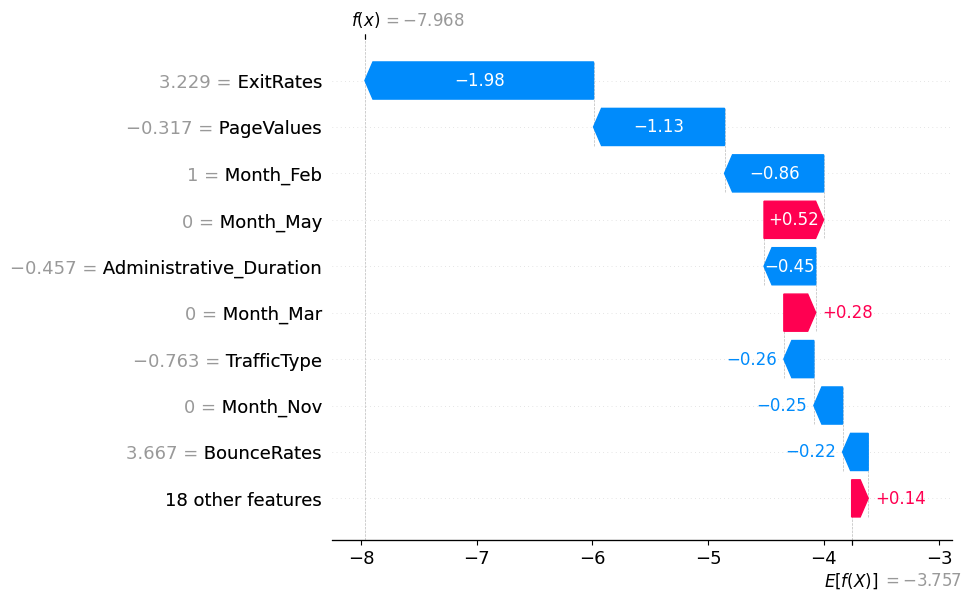


Visualização LIME:


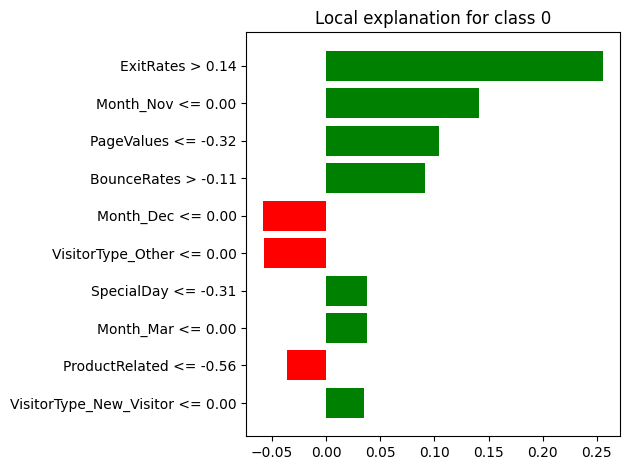


--- Explicação para a Instância 2 (Índice Original: 65, Classe Real: 1) ---

Visualização SHAP (Waterfall Plot):


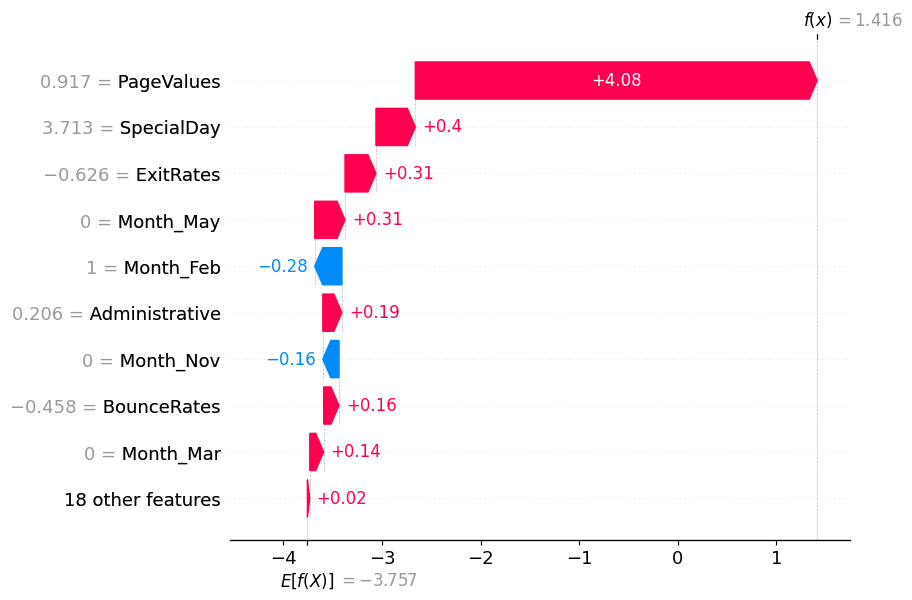


Visualização LIME:


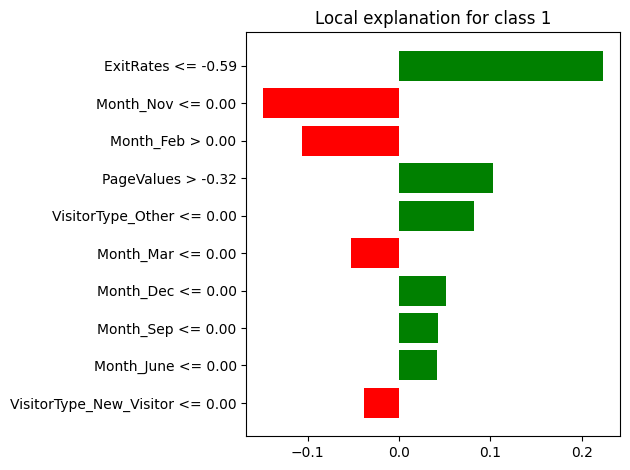


--- Explicação para a Instância 3 (Índice Original: 1353, Classe Real: 1) ---

Visualização SHAP (Waterfall Plot):


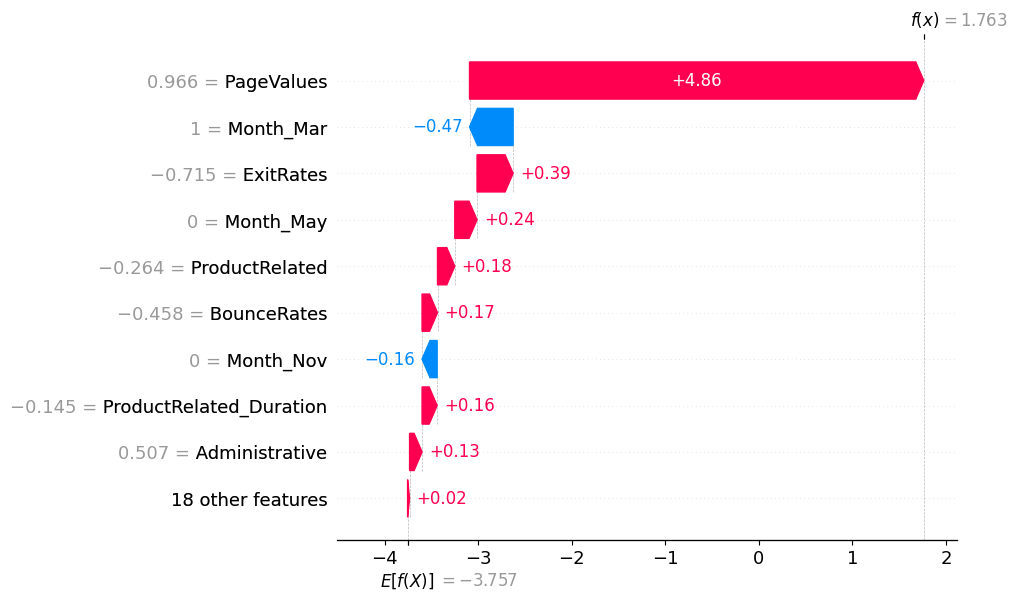


Visualização LIME:


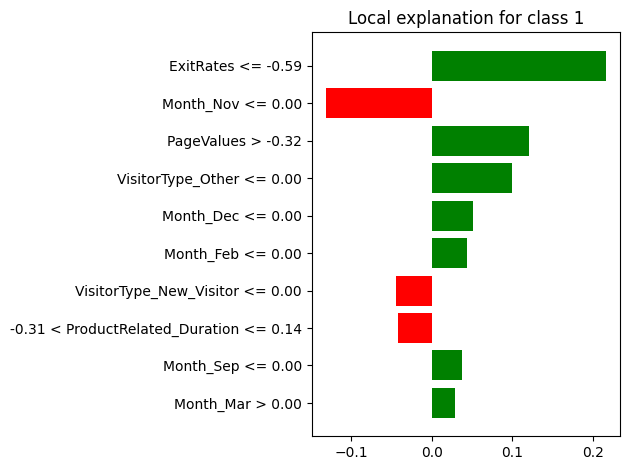


Análise de explicações locais para três instâncias concluída.


In [ ]:
# QUESTÃO 11B: Comparação de Explicações Locais com SHAP e LIME para Três Instâncias
import shap
import lime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if 'model_final' not in locals():
    raise NameError("A variável 'model_final' (seu modelo treinado) não foi encontrada.")
if 'explainer' not in locals() or 'shap_values' not in locals():
    raise NameError("Explainer SHAP ou shap_values não encontrados. Execute a Questão 10B ou 11A.")
if 'explainer_lime' not in locals():
    raise NameError("Explainer LIME não encontrado. Execute a Questão 11A.")
if 'X_processed' not in locals() or 'y_processed' not in locals():
    raise NameError("Variáveis de dados processados (X_processed, y_processed) não encontradas. Execute a Questão 6A.")
if 'all_feature_names' not in locals():
    raise NameError("Nomes das features processadas (all_feature_names) não encontrados. Execute a Questão 10A ou 11A.")

indices_instancias_escolhidas = []

negative_indices = np.where(y_processed == 0)[0]
if len(negative_indices) > 0:
    indices_instancias_escolhidas.append(negative_indices[0])

positive_indices = np.where(y_processed == 1)[0]
if len(positive_indices) > 0:
    indices_instancias_escolhidas.append(positive_indices[0])

if X_processed.shape[0] > len(indices_instancias_escolhidas):
    all_indices = np.arange(X_processed.shape[0])
    remaining_indices = np.setdiff1d(all_indices, indices_instancias_escolhidas)
    if len(remaining_indices) > 0:
        random_index = np.random.choice(remaining_indices)
        indices_instancias_escolhidas.append(random_index)

if len(indices_instancias_escolhidas) == 0:
    print("\nNenhuma instância foi selecionada para explicação.")
else:
    print("\n--- Comparação de Explicações Locais com SHAP e LIME ---")

    expected_value_positive = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
    shap.initjs()

    for i, instance_index in enumerate(indices_instancias_escolhidas):
        print(f"\n--- Explicação para a Instância {i+1} (Índice Original: {instance_index}, Classe Real: {y_processed[instance_index]}) ---")

        chosen_instance_processed = X_processed[instance_index]

        if isinstance(shap_values, list):
            shap_values_instance = shap_values[1][instance_index]
        else:
            shap_values_instance = shap_values[instance_index]

        print("\nVisualização SHAP (Waterfall Plot):")
        explanation_shap = shap.Explanation(
            values=shap_values_instance,
            base_values=expected_value_positive,
            data=chosen_instance_processed,
            feature_names=all_feature_names
        )
        shap.waterfall_plot(explanation_shap)
        plt.show()

        print("\nVisualização LIME:")
        explanation_lime = explainer_lime.explain_instance(
            data_row=chosen_instance_processed,
            predict_fn=model_final.predict_proba,
            num_features=10,
            top_labels=1
        )
        label_to_plot = explanation_lime.top_labels[0]  # Corrigido aqui
        explanation_lime.as_pyplot_figure(label=label_to_plot)
        plt.tight_layout()
        plt.show()

print("\nAnálise de explicações locais para três instâncias concluída.")


In [ ]:
# QUESTÃO 11C: Comparação dos Rankings de Importância Global (SHAP vs LIME)

import pandas as pd
from IPython.display import display

if 'shap_importance_series' not in locals():
    raise NameError("A série 'shap_importance_series' não foi encontrada. Execute a Questão 11A.")
if 'lime_importance_series' not in locals():
    raise NameError("A série 'lime_importance_series' não foi encontrada. Execute a Questão 11A.")

print("\n Rankings de Importância Global")

print("\nRanking de Importância Global com SHAP (Média Absoluta):")
display(shap_importance_series.round(3).head(10))

print("\nRanking de Importância Global Agregada com LIME (Média Absoluta dos Pesos):")
display(lime_importance_series.round(3).head(10))



 Rankings de Importância Global

Ranking de Importância Global com SHAP (Média Absoluta):


,0
Administrative,0.069
Administrative_Duration,0.137
Informational,0.039
Informational_Duration,0.038
ProductRelated,0.104
ProductRelated_Duration,0.118
BounceRates,0.122
ExitRates,0.349
PageValues,1.723
SpecialDay,0.018



Ranking de Importância Global Agregada com LIME (Média Absoluta dos Pesos):


,0
ExitRates > 0.14,0.26
ExitRates <= -0.59,0.22
Month_Nov <= 0.00,0.13
Month_Nov > 0.00,0.13
-0.46 < Administrative_Duration <= -0.41,0.12
PageValues <= -0.32,0.11
PageValues > -0.32,0.11
ProductRelated > 0.14,0.11
-0.59 < ExitRates <= -0.37,0.09
BounceRates > -0.11,0.08


As análises de importância global com SHAP e LIME revelaram que, apesar de suas diferenças metodológicas, ambos os métodos concordam sobre a relevância de ExitRates e PageValues como variáveis-chave no modelo, o que reforça a confiança na influência dessas características. Contudo, suas abordagens distintas levaram a rankings exatos diferentes, com SHAP destacando PageValues como a mais impactante, enquanto LIME priorizou as regras de ExitRates. Essa variação na ordem e na representação das features sublinha a importância de usar múltiplas ferramentas de interpretabilidade para obter uma compreensão mais completa e nuançada do comportamento do modelo, aproveitando a robustez teórica do SHAP e os insights mais granulares de LIME.

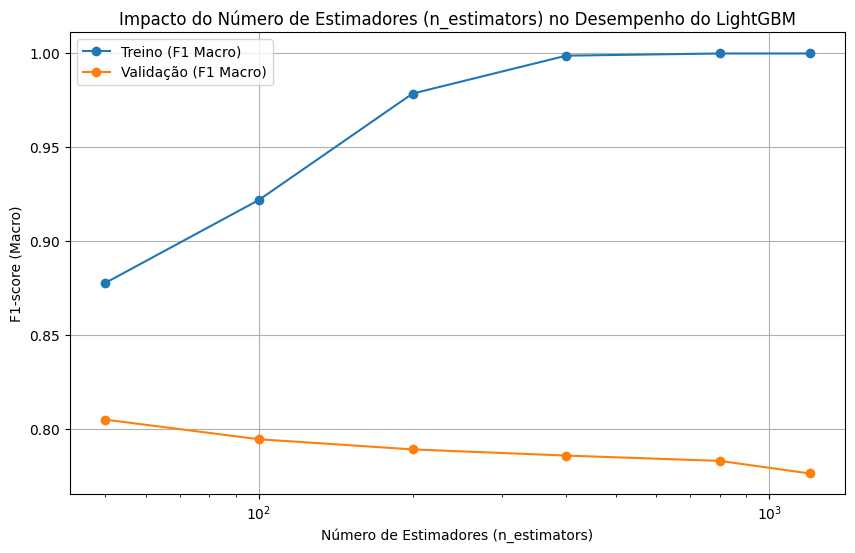

In [ ]:
# QUESTÃO 12A: Avaliando o Impacto de n_estimators no LightGBM
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

n_estimators_range = [50, 100, 200, 400, 800, 1200]

f1_scores_train = []
f1_scores_val = []

for n in n_estimators_range:
    model_lgbm = LGBMClassifier(n_estimators=n, random_state=42, verbose=-1)
    model_lgbm.fit(X_train, y_train)

    y_train_pred = model_lgbm.predict(X_train)
    y_val_pred = model_lgbm.predict(X_val)

    f1_scores_train.append(f1_score(y_train, y_train_pred, average='macro'))
    f1_scores_val.append(f1_score(y_val, y_val_pred, average='macro'))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, f1_scores_train, marker='o', label='Treino (F1 Macro)')
plt.plot(n_estimators_range, f1_scores_val, marker='o', label='Validação (F1 Macro)')
plt.title('Impacto do Número de Estimadores (n_estimators) no Desempenho do LightGBM')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('F1-score (Macro)')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


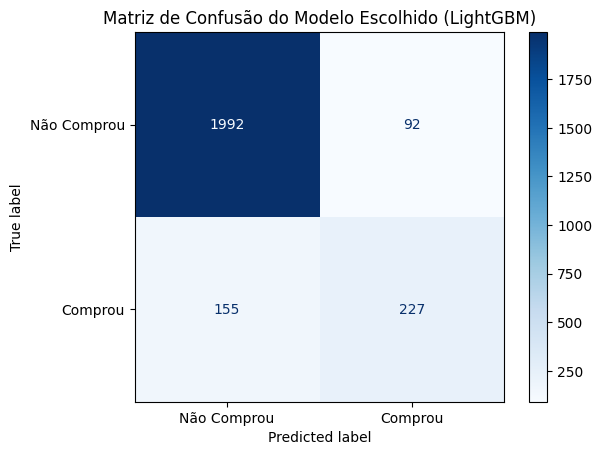

TN: 1992 | FP: 92 | FN: 155 | TP: 227


In [ ]:
# QUESTÃO 12B: Gerando a Matriz de Confusão do Modelo Escolhido
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

model_chosen = LGBMClassifier(random_state=42, verbose=-1)
model_chosen.fit(X_train_final, y_train_final)

y_pred_final = model_chosen.predict(X_test_final)

cm = confusion_matrix(y_test_final, y_pred_final)

class_names = ['Não Comprou', 'Comprou']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão do Modelo Escolhido (LightGBM)')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN: {tn} | FP: {fp} | FN: {fn} | TP: {tp}")


In [ ]:
# QUESTÃO 12C: Comparando Desempenho do Modelo Escolhido com KNN (k=5) e Regressão Logística
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from IPython.display import display

model_knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(model_knn, X_processed, y_processed, cv=5, scoring='f1_macro')

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

model_chosen = LGBMClassifier(random_state=42, verbose=-1)
model_chosen.fit(X_train_final, y_train_final)

model_knn_test = KNeighborsClassifier(n_neighbors=5)
model_lr_test = LogisticRegression(max_iter=1000)

model_knn_test.fit(X_train_final, y_train_final)
model_lr_test.fit(X_train_final, y_train_final)

y_pred_chosen = model_chosen.predict(X_test_final)
y_pred_knn = model_knn_test.predict(X_test_final)
y_pred_lr = model_lr_test.predict(X_test_final)

def evaluate_model_on_test(y_true, y_pred, model_name):
    return {
        'Modelo': model_name,
        'Acurácia (Teste)': accuracy_score(y_true, y_pred),
        'Precisão (Macro Teste)': precision_score(y_true, y_pred, average='macro'),
        'Recall (Macro Teste)': recall_score(y_true, y_pred, average='macro'),
        'F1-score (Macro Teste)': f1_score(y_true, y_pred, average='macro'),
        'F1-score (Weighted Teste)': f1_score(y_true, y_pred, average='weighted')
    }

results_test = [
    evaluate_model_on_test(y_test_final, y_pred_chosen, 'Modelo Escolhido (LightGBM)'),
    evaluate_model_on_test(y_test_final, y_pred_knn, 'KNN (k=5)'),
    evaluate_model_on_test(y_test_final, y_pred_lr, 'Regressão Logística')
]

results_test_df = pd.DataFrame(results_test)
display(results_test_df.round(4))


,Modelo,Acurácia (Teste),Precisão (Macro Teste),Recall (Macro Teste),F1-score (Macro Teste),F1-score (Weighted Teste)
0,Modelo Escolhido (LightGBM),0.8998,0.8197,0.7750,0.7946,0.8961
1,KNN (k=5),0.8702,0.7650,0.6699,0.7007,0.8562
2,Regressão Logística,0.8812,0.8177,0.6667,0.7072,0.8630
